In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
a = pd.read_csv('car data.csv')

<IPython.core.display.Javascript object>

In [336]:
a.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [129]:
a.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [98]:
## checking for any null values in any columns 
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### EDA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Sale of Cars')

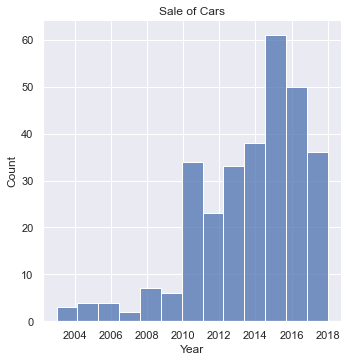

In [337]:
sns.displot(a.Year, kind = 'hist')
plt.title('Sale of Cars')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

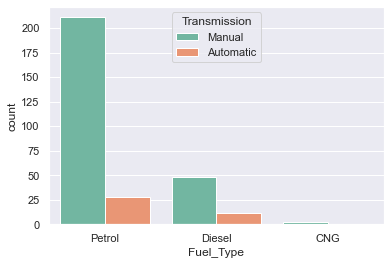

In [258]:
sns.countplot(x = 'Fuel_Type', data = a, hue = 'Transmission', palette = 'Set2')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

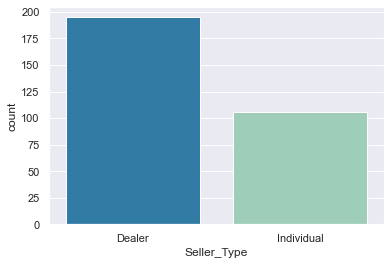

In [340]:
sns.countplot(x = 'Seller_Type', data = a, palette = 'YlGnBu_r')

<IPython.core.display.Javascript object>

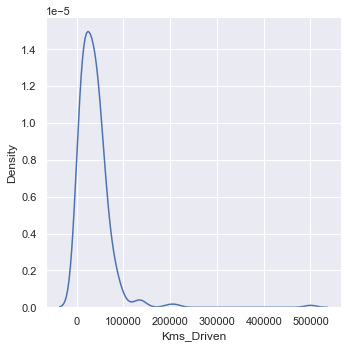

In [343]:
sns.displot(a.Kms_Driven, kind = 'kde', palette = 'Set3r')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

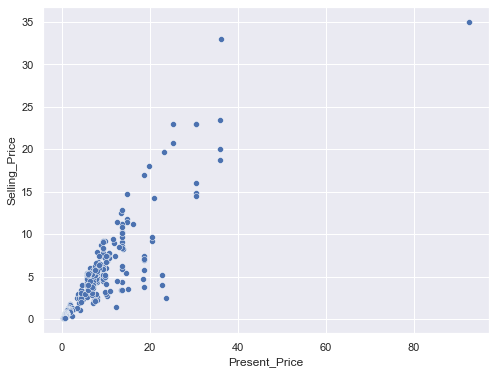

In [287]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Present_Price', y = 'Selling_Price', data =a )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

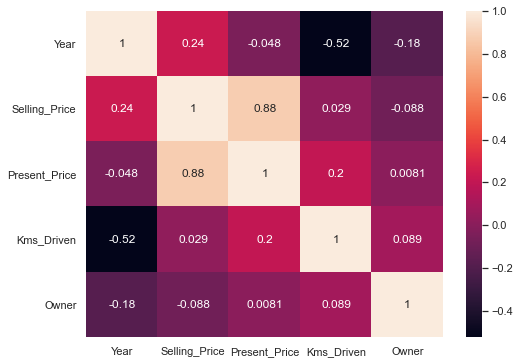

In [341]:
plt.figure(figsize = (8,6))
sns.heatmap(a.corr(), annot = True) ## checking for multicollinearity

<IPython.core.display.Javascript object>

C:\Users\Akhil Amod\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


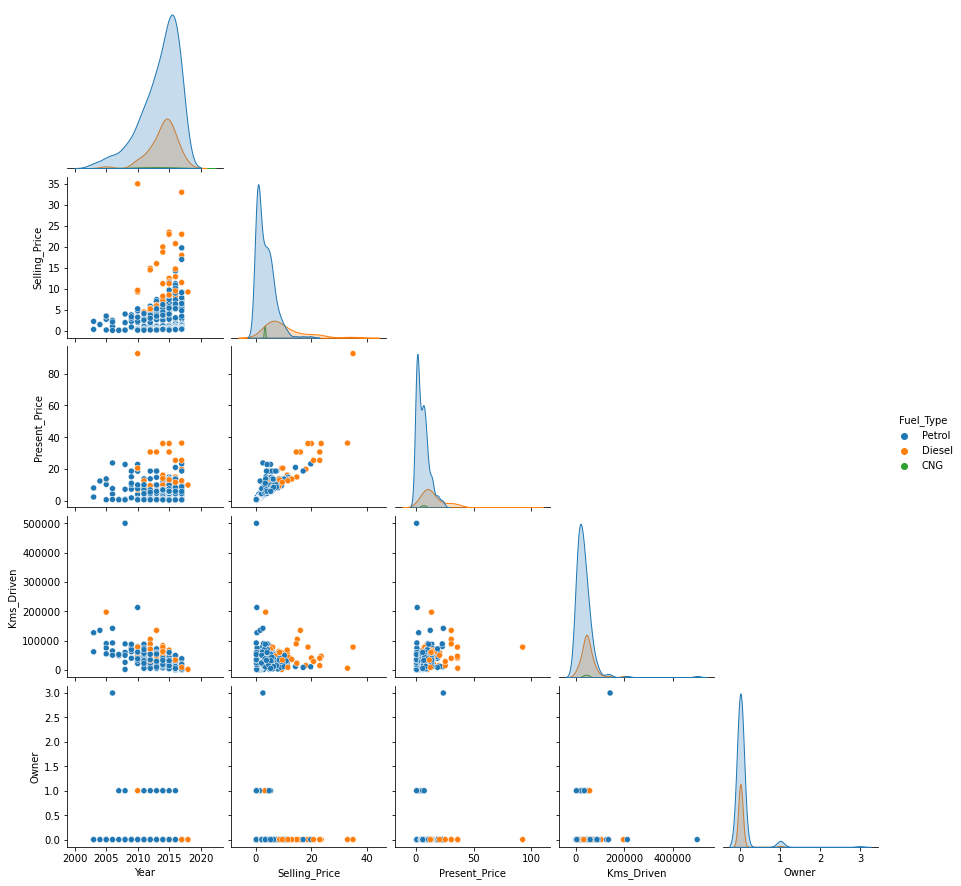

In [60]:
sns.pairplot(a, hue = 'Fuel_Type', corner = True)

### Encoding

In [73]:
## Creating features and labels 
X = a.drop(['Car_Name', 'Selling_Price', 'Kms_Driven'], axis=1)
y = a['Selling_Price']

In [74]:
## Encoding Column 'seller_type' using one_hot_encoding

dum_seller_type = pd.get_dummies(X.Seller_Type,drop_first=True)

X = X.drop( ['Seller_Type'], axis = 1)
    
X = pd.concat([X, dum_seller_type], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
## Encoding Column 'transmission' using one_hot_encoding

dum_trans = pd.get_dummies(X.Transmission,drop_first=True)

X = X.drop( ['Transmission'], axis = 1)
    
X = pd.concat([X, dum_trans], axis=1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
## Encoding Column 'Fuel_type' using one_hot_encoding

dum_fuel = pd.get_dummies(X.Fuel_Type,drop_first=True)

X = X.drop( ['Fuel_Type'], axis = 1)
    
X = pd.concat([X, dum_fuel], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
X.head()

,Year,Present_Price,Owner,Individual,Manual,Diesel,Petrol
0,2014,5.59,0,0,1,0,1
1,2013,9.54,0,0,1,1,0
2,2017,9.85,0,0,1,0,1
3,2011,4.15,0,0,1,0,1
4,2014,6.87,0,0,1,1,0


### Model Creation

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [79]:
## Creating train and test dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [80]:
X

,Year,Present_Price,Owner,Individual,Manual,Diesel,Petrol
0,2014,5.59,0,0,1,0,1
1,2013,9.54,0,0,1,1,0
2,2017,9.85,0,0,1,0,1
3,2011,4.15,0,0,1,0,1
4,2014,6.87,0,0,1,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,0,0,1,1,0
297,2015,5.90,0,0,1,0,1
298,2009,11.00,0,0,1,0,1
299,2017,12.50,0,0,1,1,0


In [81]:
## training our model on training dataset
rf = RandomForestRegressor()
model = rf.fit(X_train, y_train) 

In [82]:
predicted_price = model.predict(X_test)
R_square_test = metrics.r2_score(y_test, predicted_price)
R_square_train = metrics.r2_score(y_train, model.predict(X_train))

In [83]:
mse = metrics.mean_squared_error(y_test, predicted_price)

In [87]:
print(R_square_test)
print(R_square_train)
print(mse)

0.9661165078683263
0.990137732345912
0.8564838248857858


### Model Deployment

In [92]:
import pickle

In [93]:
pickle.dump(model,open('car_model.pkl', 'wb'))

In [ ]:
car_model = pickle.load(open('car_model.pkl', 'rb'))

app = Flask(__name__)


@app.route('/')
def home():
    return 'Hi There!'

@app.route('/predict')
def Car_price():
      
    
    Year = request.args.get('Year')
    Present_Price = request.args.get('Present_Price')
    Owner = request.args.get('Owner')
    Individual = request.args.get('Individual')
    Manual = request.args.get('Manual')
    Diesel = request.args.get('Diesel')
    Petrol = request.args.get('Petrol')
    
    data=[[Year,Present_Price,Owner,Individual,Manual,Diesel,Petrol]]
    input_data = pd.DataFrame(data, columns=['Year','Present_Price','Owner','Individual','Manual','Diesel','Petrol'])
    
    
    prediction = car_model.predict(input_data)
    return 'Sale price = ' + str(prediction)

if __name__ == '__main__':
    app.run()